# **Principal Component Analysis**

First we load the dataset:



In [1]:
import pandas as pd

df = pd.read_csv("filtered.tsv", sep="\t")
df.columns = df.columns.str.strip()
df.head()

,1,2,6,12,13,15,16,17,20,25,...,27622,27623,27633,27634,27638,27641,27642,27643,27644,27648
0,0.0534,0.2558,-1.1449,-0.3843,0.4021,0.3512,-0.9012,0.7222,-0.7375,0.2280,...,-0.2210,0.5787,0.7728,0.0400,-0.9146,0.6340,0.6287,1.2642,-1.0183,0.0125
1,0.4866,0.4736,-0.1135,0.1500,0.6200,-0.0146,-0.8901,0.2130,-0.6469,0.4252,...,-0.0877,0.5425,0.4749,-0.3254,-0.1769,0.4156,0.7505,1.0079,-0.3954,0.6992
2,0.5908,0.6439,-0.7664,-0.5907,-1.0596,1.2956,-3.7167,1.3004,-1.6517,0.5212,...,0.4996,0.9947,1.6248,-1.5840,-0.8922,0.2501,0.7772,0.9710,-0.0020,1.2096
3,-0.4971,-0.4926,-0.8767,-0.3029,-0.4014,0.7181,-0.5141,1.1114,-0.8361,-0.5792,...,-0.2264,0.8984,1.2040,-0.3831,-0.0856,0.9370,0.2867,2.7123,-0.3660,0.0959
4,0.2970,0.2770,-0.6193,-0.3508,0.0383,-0.2477,0.0367,0.5746,-0.6916,0.2816,...,0.5279,0.9044,-0.0447,0.0892,0.1246,0.6882,1.0088,1.2697,-0.2589,0.0685


The id for gene XBP1 is 4404, and id for gene GATA3 is 4359 (as given in columns.tsv). So we load only those columns in a separate dataframe:

In [2]:
df1 = df[['4404', '4359']]
df1.columns = ['XBP1', 'GATA3']
df1

,XBP1,GATA3
0,2.7836,2.2544
1,-0.3359,-0.7640
2,-1.0298,2.2355
3,2.6186,3.1732
4,2.5230,2.7418
...,...,...
100,2.4375,-0.7596
101,2.7557,0.7786
102,1.2332,1.8336
103,2.5307,1.4419


Now we load the labels:

In [3]:
label = pd.read_csv("class.tsv", names=['label'])
label

,label
0,1
1,0
2,0
3,1
4,1
...,...
100,0
101,0
102,0
103,1


Finally we combine all the data into a single dataframe:

In [4]:
df2 = pd.concat([df1, label], axis=1)
df2

,XBP1,GATA3,label
0,2.7836,2.2544,1
1,-0.3359,-0.7640,0
2,-1.0298,2.2355,0
3,2.6186,3.1732,1
4,2.5230,2.7418,1
...,...,...,...
100,2.4375,-0.7596,0
101,2.7557,0.7786,0
102,1.2332,1.8336,0
103,2.5307,1.4419,1


Now we plot:

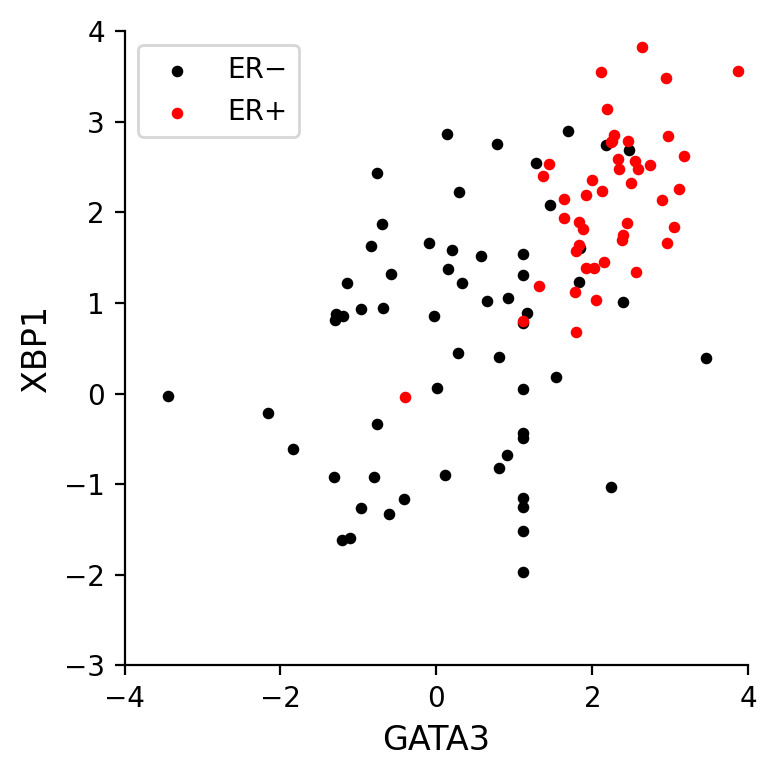

In [5]:
import matplotlib.pyplot as plt

x = df2['GATA3'].values
y = df2['XBP1'].values
color = df2['label'].values

%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(4, 4))

plt.scatter(x[color==0], y[color==0], c='black', s=10, label='ER−')
plt.scatter(x[color==1], y[color==1], c='red',   s=10, label='ER+')

plt.xlabel('GATA3', fontsize=12)
plt.ylabel('XBP1', fontsize=12)
plt.xlim(-4, 4)
plt.ylim(-3, 4)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.legend()
plt.show()

Now we do the PCA. Given features x, y we combine it into a single numpy array X. We mean center it to get X_center. Then we find the covariance matrix of X_center:

In [6]:
import numpy as np

X = np.column_stack((x, y))
X_center = X - X.mean(axis=0)
cov = np.cov(X_center, rowvar=False)

Now we get the eigenvalues and corresponding eigenvectors of the covariance matrix. Then we order them in descending order of eigenvalues. Note: we negate the eigenvectors so that while projecting later, we reproduce the same results. This doesn't affect the work since we are just swapping the direction of the PCA axes.

In [7]:
eig_vals, eig_vecs = np.linalg.eigh(cov)
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]
eig_vecs = -eig_vecs

Now we project onto the PCA axes and get the PC1 projections:

In [8]:
X_pca = X_center @ eig_vecs
pc1 = X_pca[:, 0]

Finally we plot:

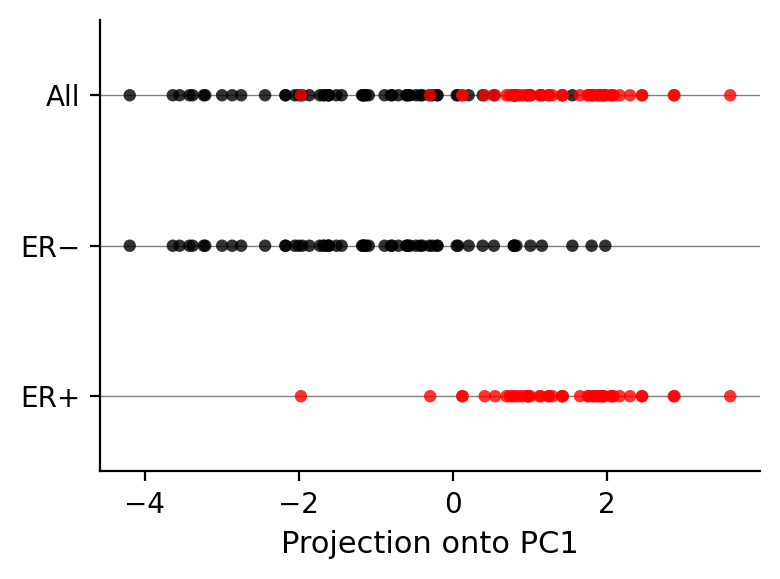

In [9]:
ypos = {'All': 2, 'ER-': 1, 'ER+': 0}

plt.figure(figsize=(4,3))

plt.scatter(pc1[color==0], np.full((color==0).sum(), ypos['All']), c='black', s=20, edgecolors='none', alpha=0.8)
plt.scatter(pc1[color==1], np.full((color==1).sum(), ypos['All']), c='red', s=20, edgecolors='none', alpha=0.8)
plt.scatter(pc1[color==0], np.full((color==0).sum(), ypos['ER-']), c='black', s=20, edgecolors='none', alpha=0.8)
plt.scatter(pc1[color==1], np.full((color==1).sum(), ypos['ER+']), c='red', s=20, edgecolors='none', alpha=0.8)

for y in ypos.values():
    plt.axhline(y=y, color='gray', linewidth=0.5, zorder=0)

plt.yticks([ypos['All'], ypos['ER-'], ypos['ER+']], ['All', 'ER−', 'ER+'], fontsize=10)
plt.xlabel('Projection onto PC1', fontsize=11)
plt.ylim(-0.5, 2.5)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()